# Факторный анализ в Python

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
from math import  sin, cos, pi 
from statsmodels.formula.api import ols
from scipy.stats import chi2
from numpy import arange

In [2]:
features = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10"]
f_len = len (features)
unclr_data = pd.read_excel ('Dannye_1.xlsx', sheet_name = 'Данные для питона')
unclr_data = unclr_data[features]

unclr_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-0.466334,-0.499452,-1.195254,-1.507236,0.069739,0.207068,-0.626404,-0.266906,-0.251121,-0.373212
1,-0.785712,-0.855048,-1.298529,-1.448984,0.329812,-0.109225,-0.316544,0.106932,-0.394951,-0.521242
2,-1.034117,-0.979066,-0.317418,-0.827632,-1.342087,-0.202253,0.406464,-0.999628,-0.682612,-0.521242
3,-1.424468,-0.768632,-1.453441,-0.245114,-0.264641,0.225674,0.561394,-1.109287,-0.768011,-0.528291
4,0.598260,-0.709319,-1.943996,-0.497539,0.682768,-0.518546,-1.349412,-0.629528,-0.535785,-0.462500


#### X78 – ПРОДАЖА АЛКОГОЛЬНОЙ ПРОДУКЦИИ НАСЕЛЕНИЮ (Пиво и пивные напитки) (тысяч декалитров)
#### X63 – СМЕРТНОСТЬ НАСЕЛЕНИЯ В ТРУДОСПОСОБНОМ ВОЗРАСТЕ
#### X44 – ЧИСЛО ЗАРЕГИСТРИРОВАННЫХ ПРЕСТУПЛЕНИЙ, СОВЕРШЕННЫХ в 2018 г. (Убийство и покушение на убийство)
#### X45 – ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ (число лет)
#### X41 – СРЕДНЕ-ДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ (В МЕСЯЦ), РУБ. 
#### X40 – ЧИСЛО ЗАРЕГИСТРИРОВАННЫХ ГРАБЕЖЕЙ, СОВЕРШЕННЫХ в 2018 г. (на 1000 человек)
#### X31 – УРОВЕНЬ БЕЗРАБОТИЦЫ

## Удаляем строки с пустыми значениями и стандартизируем данные

In [3]:
unsc_data = unclr_data[unclr_data!='-'].dropna().astype('float64')
index = unsc_data.index 
columns = unsc_data.columns 
index = unsc_data.index
columns = unsc_data.columns
scaled = (unsc_data - unsc_data.mean(axis=0))/unsc_data.std()
data = pd.DataFrame(scaled, columns=columns, index=index) 

data.head()

/Users/antonlukanov/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-0.466334,-0.499452,-1.195254,-1.507236,0.069739,0.207068,-0.626404,-0.266906,-0.251121,-0.373212
1,-0.785712,-0.855048,-1.298529,-1.448984,0.329812,-0.109225,-0.316544,0.106932,-0.394951,-0.521242
2,-1.034117,-0.979066,-0.317418,-0.827632,-1.342087,-0.202253,0.406464,-0.999628,-0.682612,-0.521242
3,-1.424468,-0.768632,-1.453441,-0.245114,-0.264641,0.225674,0.561394,-1.109287,-0.768011,-0.528291
4,0.598260,-0.709319,-1.943996,-0.497539,0.682768,-0.518546,-1.349412,-0.629528,-0.535785,-0.462500


## Корреляционная матрица

In [4]:
correlations = data.corr()

correlations

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.000000,-0.328434,0.717837,0.037041,-0.011260,0.088430,-0.042839,0.183548,-0.342709,-0.151315
X2,-0.328434,1.000000,-0.086028,0.697131,0.114888,-0.063335,0.212093,0.424869,0.691414,0.171459
X3,0.717837,-0.086028,1.000000,0.231706,0.137372,-0.111616,0.068966,0.168973,-0.133866,-0.096152
X4,0.037041,0.697131,0.231706,1.000000,0.163452,-0.152133,0.004120,0.544849,0.490472,0.177011
X5,-0.011260,0.114888,0.137372,0.163452,1.000000,-0.362135,-0.078402,0.163061,-0.096510,-0.034461
X6,0.088430,-0.063335,-0.111616,-0.152133,-0.362135,1.000000,0.072092,-0.039255,0.032160,-0.000521
X7,-0.042839,0.212093,0.068966,0.004120,-0.078402,0.072092,1.000000,0.033985,-0.001701,-0.269317
X8,0.183548,0.424869,0.168973,0.544849,0.163061,-0.039255,0.033985,1.000000,0.062749,0.005379
X9,-0.342709,0.691414,-0.133866,0.490472,-0.096510,0.032160,-0.001701,0.062749,1.000000,0.381331
X10,-0.151315,0.171459,-0.096152,0.177011,-0.034461,-0.000521,-0.269317,0.005379,0.381331,1.000000


## Проверим гипотезу о незначимости корреляционной матрицы с использованием критерия Уилкса

In [5]:
def chi_2(n,k,R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R), math.e)

chi_2_crt=chi_2(data.shape[0],data.shape[1],correlations)
print('Наблюдаемое значение составило',chi_2_crt)
p_value=chi2.sf(chi_2_crt, data.shape[1]*(data.shape[1]-1)/2)
print ('Значение p-value равно {}'.format(p_value))
if p_value>0.05:
    print('Принимаем гипотезу, матрица парных коэффициентов корреляции незначима')
else:
    print('Отвергаем гипотезу, матрица парных коэффициентов корреляции значима')

Наблюдаемое значение составило 310.9174381199846
Значение p-value равно 1.9584181649143794e-41
Отвергаем гипотезу, матрица парных коэффициентов корреляции значима


## Оценка общности признаков
### Общность- доля дисперсии признака, объясняемая общими факторами
### Для i-ого признака: квадрат оценки множественного коеффициента детерминации уравнения регрессии i-ого признака на все остальные 

In [6]:
communalities=[]
for variable in features:
    communalities.append(ols(formula="{} ~ {}"
                             .format(variable, ' + '.join(set(features)-set([variable])))
                             , data=data).fit().rsquared)

pd.DataFrame(communalities,index = features,columns = ['Communalities'])

,Communalities
X1,0.661356
X2,0.771145
X3,0.607581
X4,0.657973
X5,0.217015
X6,0.197103
X7,0.233708
X8,0.450496
X9,0.646949
X10,0.224752


## Расчет редуцированной матрицы
### Редуцированная матрица=корреляционная матрица с оценками общностей признака на диагонали

In [7]:
Rh_eval = np.empty((f_len,f_len)) 
for i in range(f_len):
    for j in range(f_len):
        if i==j:
            Rh_eval[i][j] = communalities[i]
        else:
            Rh_eval[i][j] = correlations.values [i][j]
pd.DataFrame(Rh_eval, index=features, columns=features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,0.661356,-0.328434,0.717837,0.037041,-0.011260,0.088430,-0.042839,0.183548,-0.342709,-0.151315
X2,-0.328434,0.771145,-0.086028,0.697131,0.114888,-0.063335,0.212093,0.424869,0.691414,0.171459
X3,0.717837,-0.086028,0.607581,0.231706,0.137372,-0.111616,0.068966,0.168973,-0.133866,-0.096152
X4,0.037041,0.697131,0.231706,0.657973,0.163452,-0.152133,0.004120,0.544849,0.490472,0.177011
X5,-0.011260,0.114888,0.137372,0.163452,0.217015,-0.362135,-0.078402,0.163061,-0.096510,-0.034461
X6,0.088430,-0.063335,-0.111616,-0.152133,-0.362135,0.197103,0.072092,-0.039255,0.032160,-0.000521
X7,-0.042839,0.212093,0.068966,0.004120,-0.078402,0.072092,0.233708,0.033985,-0.001701,-0.269317
X8,0.183548,0.424869,0.168973,0.544849,0.163061,-0.039255,0.033985,0.450496,0.062749,0.005379
X9,-0.342709,0.691414,-0.133866,0.490472,-0.096510,0.032160,-0.001701,0.062749,0.646949,0.381331
X10,-0.151315,0.171459,-0.096152,0.177011,-0.034461,-0.000521,-0.269317,0.005379,0.381331,0.224752


## Расчет собственных чисел и соответствующих им собственных векторов редуцированной матрицы

### Собственные значения- дисперсия выделенных факторов

In [8]:
uns_eigenvalues_Rh_eval, eigenveсtors_Rh_eval=np.linalg.eig(Rh_eval)
couple_lst=[]

for i in range(len(uns_eigenvalues_Rh_eval)):
    couple_lst.append((uns_eigenvalues_Rh_eval[i], eigenveсtors_Rh_eval[:,i]))

from operator import itemgetter

couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)
eigenvalues_Rh_eval=sorted(uns_eigenvalues_Rh_eval,reverse=True)

couple_lst

[(2.3385912330991228,
  array([ 0.22364219, -0.59026622,  0.06569533, -0.49317312, -0.07289105,
          0.06716507, -0.0375377 , -0.27245307, -0.48219186, -0.18989829])),
 (1.6296164517572769,
  array([-0.58499482, -0.01436342, -0.60433606, -0.30704351, -0.16804095,
          0.09818918, -0.03180673, -0.34273706,  0.16668255,  0.11804518])),
 (0.641132121947644,
  array([ 0.31239582,  0.02849157,  0.1359182 , -0.02339598, -0.61830459,
          0.59189253,  0.145072  , -0.09611297,  0.32728895,  0.11196861])),
 (0.5769627723823909,
  array([-0.13893233,  0.26780455, -0.11694706, -0.06531202, -0.05968486,
          0.12944783,  0.67004686,  0.17926219, -0.24104232, -0.57577609])),
 (0.2837841352995056,
  array([ 0.05352111, -0.09248608, -0.4535856 ,  0.11698955, -0.12332627,
          0.32041426, -0.32940006,  0.64583819, -0.3473365 ,  0.0708991 ])),
 (-0.08279715965274272,
  array([-0.16200933, -0.41496505, -0.06948511,  0.69169056, -0.37207103,
         -0.19061608, -0.04194791, -0.

## Сравнение суммарной общности с суммой собственных чисел редуцированной матрицы для поиска количества факторов, до которого можно снизить размерность признакового пространства. 

In [9]:
#np.trace- сумма диагональных элементов матрицы
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первого собственного числа редуцированной матрицы:', eigenvalues_Rh_eval[0])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]:
    print('Размерность признакового пространства можно снизить до одного общего фактора.')
else:
    print('До одного фактора снизить нельзя')

Суммарная общность:  4.668078658394092
Сумма оценок первого собственного числа редуцированной матрицы: 2.3385912330991228
До одного фактора снизить нельзя


In [10]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых двух собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]:
    print('Размерность признакового пространства можно снизить до двух общих факторов.')
else:
    print('До двух факторов снизить нельзя')

Суммарная общность:  4.668078658394092
Сумма оценок первых двух собственных чисел редуцированной матрицы: 3.9682076848563996
До двух факторов снизить нельзя


In [11]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых трех собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2]:
    print('Размерность признакового пространства можно снизить до трех общих факторов.')
else:
    print('До трех факторов снизить нельзя')

Суммарная общность:  4.668078658394092
Сумма оценок первых трех собственных чисел редуцированной матрицы: 4.609339806804043
До трех факторов снизить нельзя


## Критерий каменистой осыпи

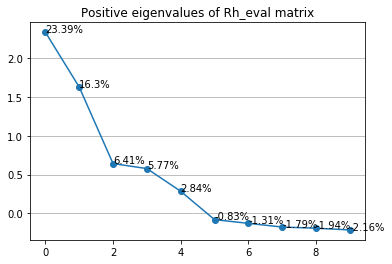

In [12]:
dft = pd.DataFrame([])
eigenvalues_pos=[]
for i in range (len(eigenvalues_Rh_eval)):
    if eigenvalues_Rh_eval[i] >= -5:
        eigenvalues_pos.append(eigenvalues_Rh_eval[i])
dft['y'] = eigenvalues_pos
dft['x'] = list (range(len(eigenvalues_pos)))
dft['Tot_var'] = (dft['y']/f_len).apply(lambda x: round(x *100, 2)).apply(str) +'%'

plt.figure(figsize=(6,4))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1)
plt.title('Positive eigenvalues of Rh_eval matrix')
plt.grid(axis='y')
plt.show()

## Критерий Кайзера

In [13]:
print('Критерий Кайзера предлагает {} фактор(-а/ов).'.format(len(uns_eigenvalues_Rh_eval[uns_eigenvalues_Rh_eval >1])))

Критерий Кайзера предлагает 2 фактор(-а/ов).


## Берем три фактора

In [14]:
fact = 2

U = np.empty ((fact,f_len)) 
for i in range(fact):
    U[i]=couple_lst[i][1]

df_U=pd.DataFrame(data=U, index=['Factor_'+str(i +1) for i in range(fact)], columns=features)

df_U

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Factor_1,0.223642,-0.590266,0.065695,-0.493173,-0.072891,0.067165,-0.037538,-0.272453,-0.482192,-0.189898
Factor_2,-0.584995,-0.014363,-0.604336,-0.307044,-0.168041,0.098189,-0.031807,-0.342737,0.166683,0.118045


In [15]:
sqrt_l=np.eye(fact)
for i in range(fact):
    sqrt_l[i][i]=math.sqrt(eigenvalues_Rh_eval[i])  
A=np.dot(U.T,sqrt_l) #матрица весовых коэфф
df_A = pd.DataFrame(data=A, columns=['Factor_'+str(i + 1) for i in range(fact)], index=features) #Датафрейм для А

df_A

,Factor_1,Factor_2
X1,0.342004,-0.746784
X2,-0.902662,-0.018336
X3,0.100464,-0.771474
X4,-0.754183,-0.391961
X5,-0.111468,-0.214515
X6,0.102712,0.125345
X7,-0.057404,-0.040603
X8,-0.416648,-0.437526
X9,-0.737390,0.212781
X10,-0.290401,0.150692


In [16]:
#Важно отметить, что матрица, рассчитанная таким способом может не совпасть с аналогичной, полученной с помощью других программных пакетов. Это связано с тем, что собственные вектора матрицы R_h берутся с точностью до знака. Для того, чтобы скорректировать полученные результаты, можно воспользоваться следующим кодом
df_A['Factor_1'] *= -1# если не совпал первый столбец
df_A['Factor_2'] *= -1# если не совпал второй столбец
#df_A['Factor_3'] *= -1# если не совпал третий столбец

In [30]:
df_A

,Factor_1,Factor_2
X1,0.342004,-0.746784
X2,-0.902662,-0.018336
X3,0.100464,-0.771474
X4,-0.754183,-0.391961
X5,-0.111468,-0.214515
X6,0.102712,0.125345
X7,-0.057404,-0.040603
X8,-0.416648,-0.437526
X9,-0.737390,0.212781
X10,-0.290401,0.150692


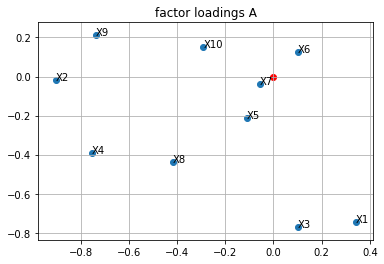

In [31]:
plt.scatter(df_A['Factor_1'], df_A['Factor_2'])
plt.scatter (0, 0, c = 'r')
plt.grid()
plt.title ('factor loadings A')
for variable in features :
    plt.annotate('{}'.format(variable), xy = (df_A['Factor_1'][variable],df_A['Factor_2'][variable]))

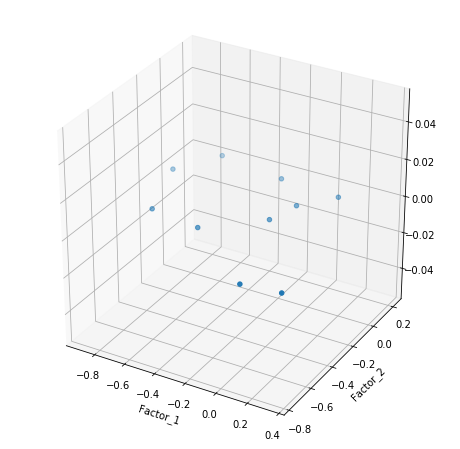

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_A['Factor_1'], df_A['Factor_2'])
#ax.scatter(df_A['Factor_1'], df_A['Factor_2'], df_A['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
#ax.set_zlabel('Factor_3')

plt.show()

## Функции квартимакс и варимакс для расчета критериев q и v при вращении факторных осей

In [32]:
def quartimax (X): 
    value = 0
    m = X.shape[1]
    for row in X:
        value += (sum (row**4) - (sum(row**2))**2)/m**2
    return value

def varimax (X) :
    value = 0
    k = X.shape[0]
    for row in X.T:
        value += (k*sum(row**4) -sum(row**2)**2)/k**2
    return value

def criteria (method,X):
    if method == 'varimax':
        return varimax(X)
    elif method == 'quartimax':
        return quartimax (X)
    else:
        print ('wrong input')

In [140]:
df_A1 = df_A.copy()
df_A1 = df_A1.drop('Factor_3', 1)

KeyError: "['Factor_3'] not found in axis"

## Вращение в случае двух факторов

In [33]:
rad_column = []
grad_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.0001):

    rad_column.append(alpha)
    grad_column.append(alpha*180/pi)

    grad = alpha
    T = [[cos(grad),sin(grad)],
         [-sin(grad),cos(grad)]]
    B = np.dot (A,T)
    dict_for_B[criteria('quartimax',B)] = B
    criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['rad'] = rad_column
df_rotation['grad'] = grad_column
df_rotation ['criteria'] = criteria_column

In [34]:
df_rotation

,rad,grad,criteria
0,0.0000,0.000000,-0.109702
1,0.0001,0.005730,-0.109723
2,0.0002,0.011459,-0.109744
3,0.0003,0.017189,-0.109765
4,0.0004,0.022918,-0.109786
...,...,...,...
15703,1.5703,89.971563,-0.109599
15704,1.5704,89.977292,-0.109619
15705,1.5705,89.983022,-0.109640
15706,1.5706,89.988751,-0.109661


## Для трех факторов (выполняется около 10 минут), используем квартимакс в качестве критерия

In [123]:
import tqdm
radx_column = []
gradx_column=[]
rady_column = []
grady_column=[]
radz_column = []
gradz_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.01):
    print(alpha)
    for alpha2 in arange(0, pi/2, 0.01):
        for alpha3 in arange(0, pi/2, 0.01):
            radx_column.append(alpha)
            gradx_column.append(alpha*180/pi)
            rady_column.append(alpha2)
            grady_column.append(alpha2*180/pi)
            radz_column.append(alpha3)
            gradz_column.append(alpha3*180/pi)            
            
            grad = alpha
            grad2 = alpha2
            grad3 = alpha3
            T = [[1, 0, 0],
                 [0, cos(grad), -sin(grad)],
                 [0, sin(grad), cos(grad)]]
            T2 = [[cos(grad2), 0, sin(grad2)],
                 [0, 1, 0],
                 [-sin(grad2), 0, cos(grad2)]]
            T3 = [[cos(grad3), -sin(grad3), 0],
                 [sin(grad3), cos(grad3), 0],
                 [0, 0, 1]]
            B = np.dot(np.dot(np.dot (A,T), T2), T3)
            dict_for_B[criteria('quartimax',B)] = B
            criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['radx'] = radx_column
df_rotation['gradx'] = gradx_column
df_rotation['rady'] = rady_column
df_rotation['grady'] = grady_column
df_rotation['radz'] = radz_column
df_rotation['gradz'] = gradz_column
df_rotation ['criteria'] = criteria_column
df_rotation

0.0


ValueError: shapes (10,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

In [35]:
criteria_best = df_rotation ['criteria'].max()

criteria_best

-0.08633216546825599

## Вывод лучшего угла вращения для трех факторов

In [125]:
radx_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radx']
gradx_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradx']
rady_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rady']
grady_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grady']
radz_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radz']
gradz_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradz']

print ('Лучший угол для вращения x:{:.3f} y:{:.3f} z:{:.3f} радиан или x:{:.3f} y:{:.3f} z:{:.3f} градусов'.format (radx_best, gradx_best, rady_best, grady_best, radz_best, gradz_best))

KeyError: 'radx'

## Вывод лучшего угла вращения для двух факторов (оставил для проверки)

In [36]:
rad_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rad']
grad_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grad']

print ('Лучший угол для вращения :{:.3f} радиан или {:.3f} градусов'.format (rad_best,grad_best))

Лучший угол для вращения :1.361 радиан или 77.957 градусов


## Матрица факторного отображения после вращения

In [37]:
B = dict_for_B [criteria_best]
df_B = pd.DataFrame(data=B, columns=['Factor_'+str(i +1) for i in range(fact)], index=features)

df_B

,Factor_1,Factor_2
X1,0.801707,0.178658
X2,-0.170410,-0.886620
X3,0.775456,-0.062716
X4,0.225972,-0.819366
X5,0.186536,-0.153774
X6,-0.101155,0.126605
X7,0.027732,-0.064613
X8,0.340962,-0.498768
X9,-0.361955,-0.676763
X10,-0.207968,-0.252567


In [40]:
df_B['Factor_2'] *= -1
df_B

,Factor_1,Factor_2
X1,0.801707,-0.178658
X2,-0.170410,0.886620
X3,0.775456,0.062716
X4,0.225972,0.819366
X5,0.186536,0.153774
X6,-0.101155,-0.126605
X7,0.027732,0.064613
X8,0.340962,0.498768
X9,-0.361955,0.676763
X10,-0.207968,0.252567


In [42]:
cols = df_B.columns.tolist()
cols

['Factor_1', 'Factor_2']

In [43]:
cols = ['Factor_2', 'Factor_1']

In [45]:
df_B = df_B[cols]

In [47]:
df_B = df_B.rename(columns={'Factor_2': 'Factor_1', 'Factor_1': 'Factor_2'})
df_B

,Factor_1,Factor_2
X1,-0.178658,0.801707
X2,0.886620,-0.170410
X3,0.062716,0.775456
X4,0.819366,0.225972
X5,0.153774,0.186536
X6,-0.126605,-0.101155
X7,0.064613,0.027732
X8,0.498768,0.340962
X9,0.676763,-0.361955
X10,0.252567,-0.207968


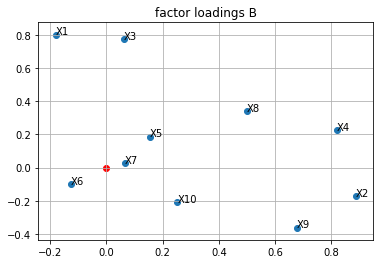

In [48]:
plt.scatter(df_B['Factor_1'],df_B['Factor_2'])
plt.scatter (0,0,c= 'r')
plt.grid()
plt.title ('factor loadings B')
for variable in features :
    plt.annotate('{}'.format(variable),xy = (df_B['Factor_1'][variable],df_B['Factor_2'][variable]))

KeyError: 'Factor_3'

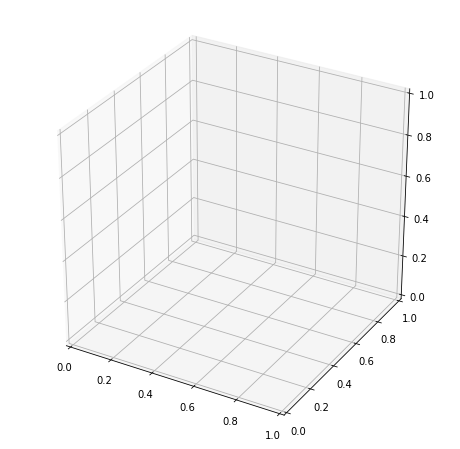

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_B['Factor_1'], df_B['Factor_2'], df_B['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

## Оценка редуцированной матрицы парных коэффициентов корреляции

In [49]:
Rh_real = np.dot(B,B.T)

pd.DataFrame(Rh_real,index = features,columns = features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,0.674652,-0.295021,0.610483,0.034777,0.122074,-0.058478,0.010689,0.184242,-0.411091,-0.211853
X2,-0.295021,0.815135,-0.076540,0.687959,0.104551,-0.095012,0.052561,0.384114,0.661712,0.259371
X3,0.610483,-0.076540,0.605265,0.226619,0.154294,-0.086381,0.025557,0.295682,-0.238236,-0.145430
X4,0.034777,0.687959,0.226619,0.722425,0.168149,-0.126594,0.059208,0.485721,0.472725,0.159950
X5,0.122074,0.104551,0.154294,0.168149,0.058442,-0.038337,0.015109,0.140299,0.036551,0.000045
X6,-0.058478,-0.095012,-0.086381,-0.126594,-0.038337,0.026261,-0.010986,-0.097636,-0.049068,-0.010939
X7,0.010689,0.052561,0.025557,0.059208,0.015109,-0.010986,0.004944,0.041682,0.033690,0.010552
X8,0.184242,0.384114,0.295682,0.485721,0.140299,-0.097636,0.041682,0.365024,0.214134,0.055063
X9,-0.411091,0.661712,-0.238236,0.472725,0.036551,-0.049068,0.033690,0.214134,0.589019,0.246203
X10,-0.211853,0.259371,-0.145430,0.159950,0.000045,-0.010939,0.010552,0.055063,0.246203,0.107041


## Оценка остаточной матрицы парных коэффициентов корреляции

In [50]:
D2 = correlations.values - Rh_real

pd.DataFrame(D2,index = features,columns = features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,0.325348,-0.033413,0.107354,0.002264,-0.133333,0.146907,-0.053529,-0.000694,0.068382,0.060537
X2,-0.033413,0.184865,-0.009488,0.009173,0.010337,0.031677,0.159531,0.040755,0.029702,-0.087912
X3,0.107354,-0.009488,0.394735,0.005087,-0.016922,-0.025235,0.043409,-0.126709,0.104370,0.049278
X4,0.002264,0.009173,0.005087,0.277575,-0.004697,-0.025539,-0.055088,0.059127,0.017747,0.017061
X5,-0.133333,0.010337,-0.016922,-0.004697,0.941558,-0.323797,-0.093510,0.022762,-0.133061,-0.034506
X6,0.146907,0.031677,-0.025235,-0.025539,-0.323797,0.973739,0.083077,0.058381,0.081228,0.010418
X7,-0.053529,0.159531,0.043409,-0.055088,-0.093510,0.083077,0.995056,-0.007697,-0.035391,-0.279868
X8,-0.000694,0.040755,-0.126709,0.059127,0.022762,0.058381,-0.007697,0.634976,-0.151386,-0.049684
X9,0.068382,0.029702,0.104370,0.017747,-0.133061,0.081228,-0.035391,-0.151386,0.410981,0.135128
X10,0.060537,-0.087912,0.049278,0.017061,-0.034506,0.010418,-0.279868,-0.049684,0.135128,0.892959


## Оценки характерностей

In [51]:
charact =[]
for i in range(D2.shape[0]):
    charact.append (math.sqrt(D2[i][i]))
    
charact

[0.5703926840404461,
 0.42995974464825604,
 0.6282794230378629,
 0.5268540760339728,
 0.9703391679365899,
 0.9867821198195325,
 0.9975249920236879,
 0.796853743380736,
 0.6410778080738103,
 0.9449651112017127]

## Связь исходных признаков с главными факторами

In [135]:
for i in range(0,f_len):
    print('{} = {:.3f}*F{} + {:.3f}*F{} + {:.3f}*F{} + {:.3f}*D{}'.format(features[i], B[i,0], 1, B[i,1], 2, B[i, 2], 3, charact[i], i+1))

IndexError: index 2 is out of bounds for axis 1 with size 2

In [30]:
for i in range(0,f_len):
    print('{} = {:.3f}*F{} + {:.3f}*F{} + {:.3f}*D{}'.format(features[i], B[i,0], 1, B[i,1], 2, charact[i], i+1))

X1 = 0.802*F1 + 0.179*F2 + 0.570*D1
X2 = -0.170*F1 + -0.887*F2 + 0.430*D2
X3 = 0.775*F1 + -0.063*F2 + 0.628*D3
X4 = 0.226*F1 + -0.819*F2 + 0.527*D4
X5 = 0.187*F1 + -0.154*F2 + 0.970*D5
X6 = -0.101*F1 + 0.127*F2 + 0.987*D6
X7 = 0.028*F1 + -0.065*F2 + 0.998*D7
X8 = 0.341*F1 + -0.499*F2 + 0.797*D8
X9 = -0.362*F1 + -0.677*F2 + 0.641*D9
X10 = -0.208*F1 + -0.253*F2 + 0.945*D10


## Индивидуальные значения главных факторов, полученные методом Бартлетта

In [52]:
scr_charact = np.eye(f_len)
for i in range(f_len):
    scr_charact[i][i] = D2[i][i]

Q = np.linalg.inv(np.dot(np.dot(B.T, np.linalg.inv(scr_charact)), B))
W = np.dot(np.dot(B.T,np.linalg.inv(scr_charact)),data.values.T)
F = np.dot(Q, W)
df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect', 'Factor3_lect'] )
                  
df_factor_scores_lect

ValueError: Shape of passed values is (85, 2), indices imply (85, 3)

In [53]:
scr_charact = np.eye(f_len)
for i in range(f_len):
    scr_charact[i][i] = D2[i][i]

Q = np.linalg.inv(np.dot(np.dot(B.T, np.linalg.inv(scr_charact)), B))
W = np.dot(np.dot(B.T,np.linalg.inv(scr_charact)),data.values.T)
F = np.dot(Q, W)
df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect'] )
                  
df_factor_scores_lect

,Factor1_lect,Factor2_lect
0,-1.112763,-1.007264
1,-1.177126,-1.162926
2,-0.881123,-1.137435
3,-1.446542,-0.874785
4,-0.543382,-0.876391
...,...,...
80,-2.134626,1.716923
81,-1.063871,1.555493
82,-0.501689,0.478924
83,-1.447895,1.380401


## Индивидуальные значения главных факторов, полученные методом, который используется в программе Statistica

In [54]:
factor_score_coefficients = np.dot(np.linalg.inv(correlations),B)
factor_scores = np.dot (data.values,factor_score_coefficients)
df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , columns = ['Factor1_stat','Factor2_stat', 'Factor3_stat'])
df_factor_scores_stat

ValueError: Shape of passed values is (85, 2), indices imply (85, 3)

In [55]:
factor_score_coefficients = np.dot(np.linalg.inv(correlations),B)
factor_scores = np.dot (data.values,factor_score_coefficients)
df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , columns = ['Factor1_stat','Factor2_stat'])
df_factor_scores_stat

,Factor1_stat,Factor2_stat
0,-0.861086,-0.829731
1,-0.898054,-1.003573
2,-0.694861,-1.034486
3,-1.101280,-0.820298
4,-0.382886,-0.699614
...,...,...
80,-1.828563,1.553150
81,-1.277232,1.301188
82,-0.576150,0.524913
83,-1.237218,1.418003


## Собираем результат

In [35]:
df_result = pd.concat([df_factor_scores_lect, df_factor_scores_stat], axis=1)

df_result

,Factor1_lect,Factor2_lect,Factor1_stat,Factor2_stat
0,-1.112763,1.007264,-0.861086,0.829731
1,-1.177126,1.162926,-0.898054,1.003573
2,-0.881123,1.137435,-0.694861,1.034486
3,-1.446542,0.874785,-1.101280,0.820298
4,-0.543382,0.876391,-0.382886,0.699614
...,...,...,...,...
80,-2.134626,-1.716923,-1.828563,-1.553150
81,-1.063871,-1.555493,-1.277232,-1.301188
82,-0.501689,-0.478924,-0.576150,-0.524913
83,-1.447895,-1.380401,-1.237218,-1.418003


# Кластеризация

In [36]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

classes = pd.read_excel('classes.xlsx')
F = pd.DataFrame(factor_scores)
F.columns = ['Factor_' + str(i + 1) for i in range(factor_scores.shape[1])]
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,ward_old,kmeans_old
0,-0.861086,0.829731,6,3
1,-0.898054,1.003573,4,4
2,-0.694861,1.034486,6,3
3,-1.101280,0.820298,6,4
4,-0.382886,0.699614,5,5
...,...,...,...,...
80,-1.828563,-1.553150,1,1
81,-1.277232,-1.301188,6,3
82,-0.576150,-0.524913,7,6
83,-1.237218,-1.418003,7,7


In [37]:
# Кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Text(0.5, 1.0, 'ward method')

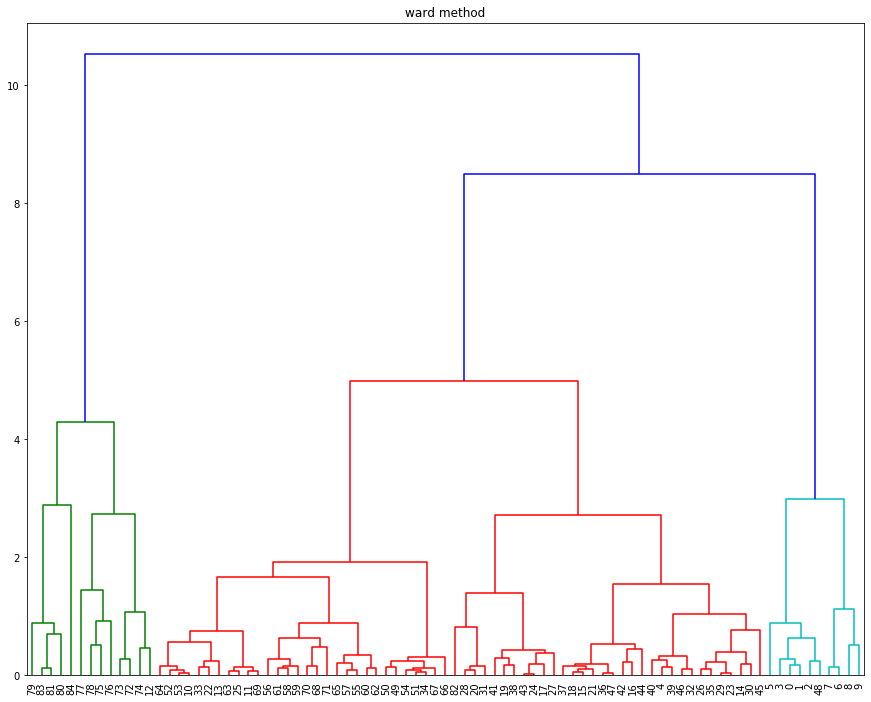

In [38]:
Z = hierarchy.linkage(factor_scores, method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

In [39]:
n_clusters = 7
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(factor_scores)

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(factor_scores)

F['ward_new'] = ward.labels_
F['kmeans_new'] = kmeans.labels_
F

,Factor_1,Factor_2,ward_old,kmeans_old,ward_new,kmeans_new
0,-0.861086,0.829731,6,3,5,4
1,-0.898054,1.003573,4,4,5,4
2,-0.694861,1.034486,6,3,5,4
3,-1.101280,0.820298,6,4,5,4
4,-0.382886,0.699614,5,5,1,4
...,...,...,...,...,...,...
80,-1.828563,-1.553150,1,1,4,3
81,-1.277232,-1.301188,6,3,4,3
82,-0.576150,-0.524913,7,6,1,3
83,-1.237218,-1.418003,7,7,4,3


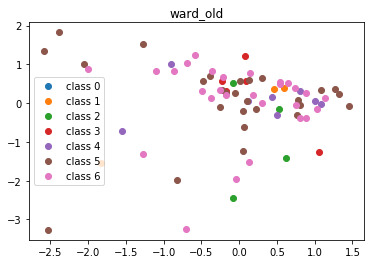

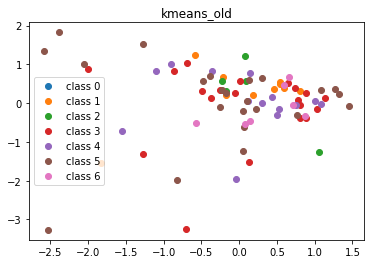

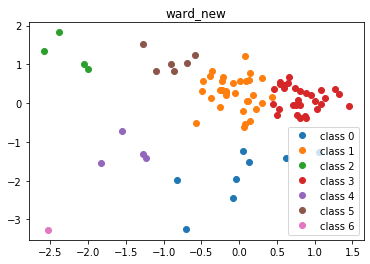

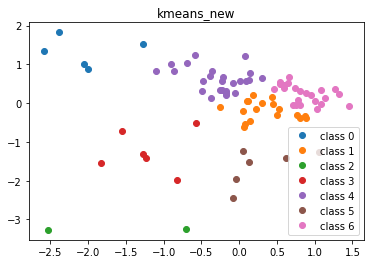

In [40]:
# Построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
    plt.legend()
    plt.show()


AttributeError: 'DataFrame' object has no attribute 'Factor_3'

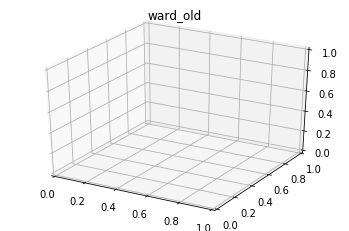

In [41]:
# Трехмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

In [44]:
F.to_excel('4lab_result.xlsx')